### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

### Creating directory for visualization

In [2]:
import pathlib
from config import config, initializing
initializing()

pathlib.Path(config['visualization_dir']).mkdir(
        parents=True, exist_ok=True)

### Read dataset

In [4]:
# defining the column name
names = ['age','workclass','fnlwgt','education','education-num',
        'marital-status','occupation','relationship','race','sex',
        'capital-gain','capital-loss','hours-per-week','native-country',
        'y']

# load dataset      # /home/mdsamiul/github_project/fair_classifier_ml/data/adult.data
df = pd.read_csv('E:/canada syntex/Github/fair_classifier_ml/data/adult.data',names=names,na_values='?', sep=r'\s*,\s*')
df = df.dropna() # remove missing value

print("Length of the dataset: ",len(df))
print("The dataset shape: ",df.shape)

C:\Users\rkana\AppData\Local\Temp\ipykernel_13416\2361227395.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('E:/canada syntex/Github/fair_classifier_ml/data/adult.data',names=names,na_values='?', sep=r'\s*,\s*')


Length of the dataset:  30162
The dataset shape:  (30162, 15)


### Dataset related information

First we see the first five column to get an overview of the dataset.

In [5]:
df.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
fnlwgt,77516,83311,215646,234721,338409
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
education-num,13,13,9,7,13
marital-status,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female


Using info() we can see name, number of non-null value and data type of each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  y               30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Here describe() function gives us summary statistics  of each column in the dataset. For numerical values it's include:
 - Total number of value
 - Average value
 - Standard deviation
 - Minimum value
 - Maximum value
 
For string value it's include:
 - Number of unique value
 - Highest number of occurrence
 - Frequency

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,30162.0,NaN,NaN,NaN,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
workclass,30162,7,Private,22286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,30162.0,NaN,NaN,NaN,189793.83393,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education,30162,16,HS-grad,9840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,30162.0,NaN,NaN,NaN,10.121312,2.549995,1.0,9.0,10.0,13.0,16.0
marital-status,30162,7,Married-civ-spouse,14065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,30162,14,Prof-specialty,4038,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,30162,6,Husband,12463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,30162,5,White,25933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,30162,2,Male,20380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The upper cell did not give us unique value for all the columns in the dataset. So, here nunique() gives us unique value for all the features.

In [46]:
df.nunique()

age                  72
workclass             7
fnlwgt            20263
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
y                     2
dtype: int64

Next we will the histogram for the column that has numerical values. It will give us an idea about the data distribution.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

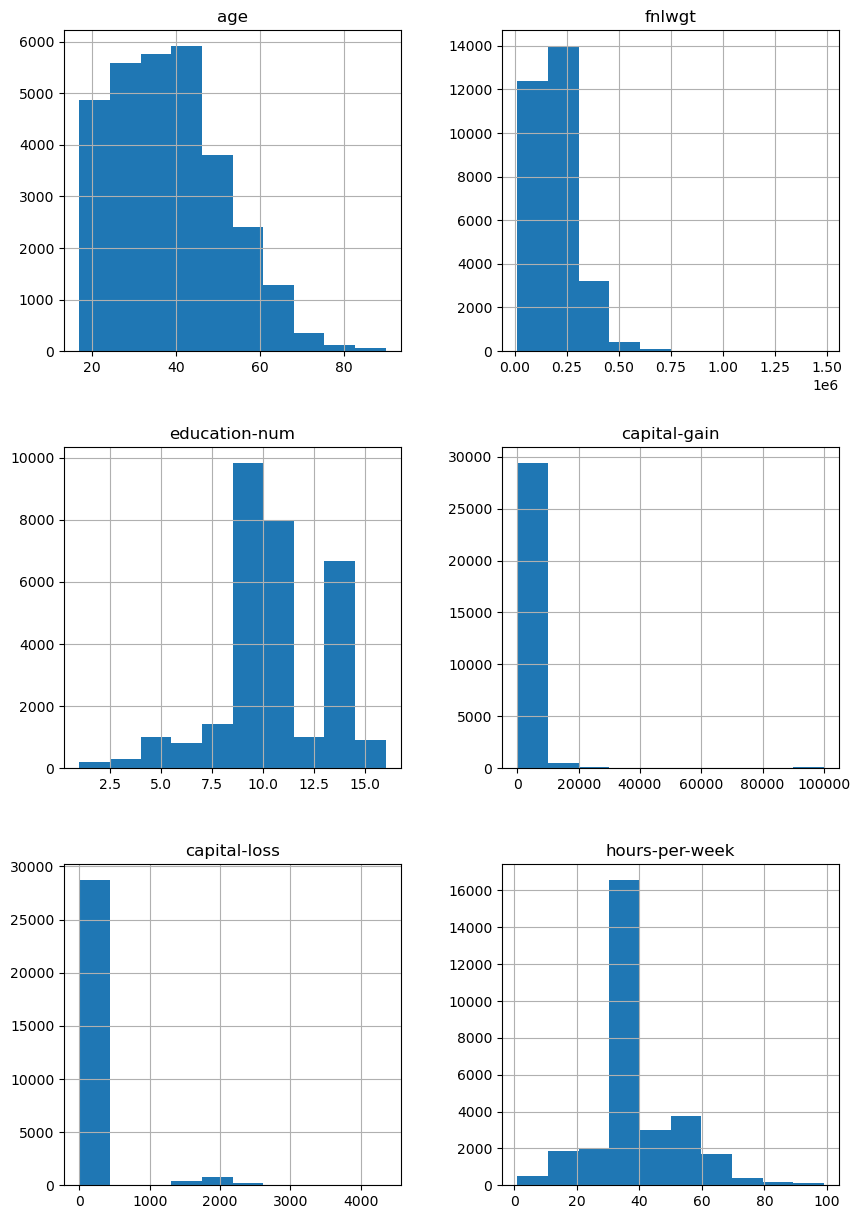

In [53]:
df.hist(bins=10, figsize=(10, 15))

### Unbalanced dataset

We will start by seeing if our dataset is unbalanced. Specifically, we mean unbalanced in terms of the sensitive attributes. Looking at below figure, we have the breakdown of the population by race and sex. You can see that we do have an unbalanced dataset. The first chart shows that 86% of our population is white. Similarly, 68% of the population is male.

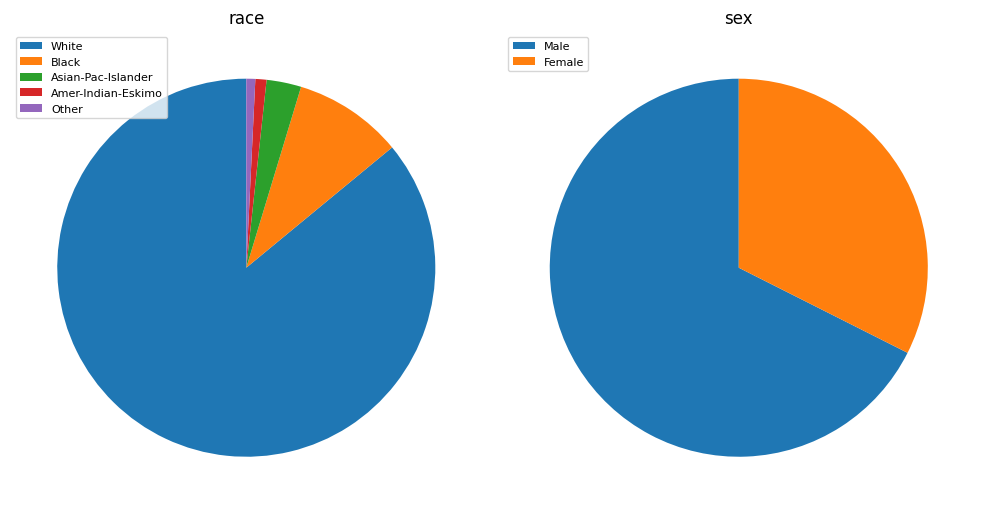

In [9]:
# 'native-country','occupation','education', 'relationship', 'marital-status', 'workclass'
col = ['race', 'sex']

plt.figure(figsize=(10, 15))

len = 1
for i in col:
    plt.subplot(320+len)
    counts = df[i].value_counts()
    labels = counts.index
    plt.pie(counts, startangle=90)
    plt.legend(labels, loc=2, fontsize=8)
    plt.title(i, size=12)
    len = len + 1

plt.tight_layout()
plt.savefig(config['visualization_dir']+'unbalnced_datsets.png' ,format='png', bbox_inches='tight', dpi=150)

### Defining protected features

Now, we will need to define the protected features. We do this by creating binary variables using the sensitive attributes. We define the variable so that 1 represents a privileged group and 0 represents an unprivileged group. Typically, the unprivileged group will have faced historical injustice in the past. In other words, it is the group that will most likely face unfair decisions from a biased model.

In [34]:
df_fair = df[['race','sex']]

#Define protected variables 
df_fair['priv_race'] = [1 if r=='White' else 0 for r in df_fair['race']]
df_fair['priv_sex'] = [1 if s=='Male' else 0 for s in df_fair['sex']]

#Define target variable 
df_fair['y'] =  [1 if y == '>50K'else 0 for y in df['y']]

df_fair.head(10)

/home/mdsamiul/anaconda3/envs/tf_2/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/mdsamiul/anaconda3/envs/tf_2/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/mdsamiul/anaconda3/envs/tf_2/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,race,sex,priv_race,priv_sex,y
0,White,Male,1,1,0
1,White,Male,1,1,0
2,White,Male,1,1,0
3,Black,Male,0,1,0
4,Black,Female,0,0,0
5,White,Female,1,0,0
6,Black,Female,0,0,0
7,White,Male,1,1,1
8,White,Female,1,0,1
9,White,Male,1,1,1


### Prevelance

In [35]:
#Calculate prevelance
prev = df_fair['y'].mean()
prev_race = df_fair.groupby('priv_race')['y'].mean()
prev_sex = df_fair.groupby('priv_sex')['y'].mean()
prev_comb = df_fair.groupby(['priv_race','priv_sex'])['y'].mean()

print(prev)
print(prev_race)
print(prev_sex)
print(prev_comb)

0.24892248524633645
priv_race
0    0.158193
1    0.263718
Name: y, dtype: float64
priv_sex
0    0.113678
1    0.313837
Name: y, dtype: float64
priv_race  priv_sex
0          0           0.074722
           1           0.225448
1          0           0.122989
           1           0.325313
Name: y, dtype: float64


### Proxy Variable

In [36]:
#Target variable 
y = [1 if y == '>50K' else 0 for y in df['y']]

#Model features
X = df[['age','education-num','hours-per-week']]
X['marital-status'] = [1 if x=='Married-civ-spouse' else 0 for x in df['marital-status']] 
X['native-country'] = [1 if x=='United-States' else 0 for x in df['native-country']] 

occ_groups = {
    'Priv-house-serv':0,'Other-service':0,'Handlers-cleaners':0,
    'Farming-fishing':1,'Machine-op-inspct':1,'Adm-clerical':1,
    'Transport-moving':2,'Craft-repair':2,'Sales':2,
    'Armed-Forces':3,'Tech-support':3,'Protective-serv':3,
    'Prof-specialty':4,'Exec-managerial':4}

X['occupation'] = [occ_groups[x] for x in df['occupation']]

X.head()

/home/mdsamiul/anaconda3/envs/tf_2/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mdsamiul/anaconda3/envs/tf_2/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/mdsamiul/anaconda3/envs/tf_2/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,age,education-num,hours-per-week,marital-status,native-country,occupation
0,39,13,40,0,1,1
1,50,13,13,1,1,4
2,38,9,40,0,1,0
3,53,7,40,1,1,0
4,28,13,40,1,0,4


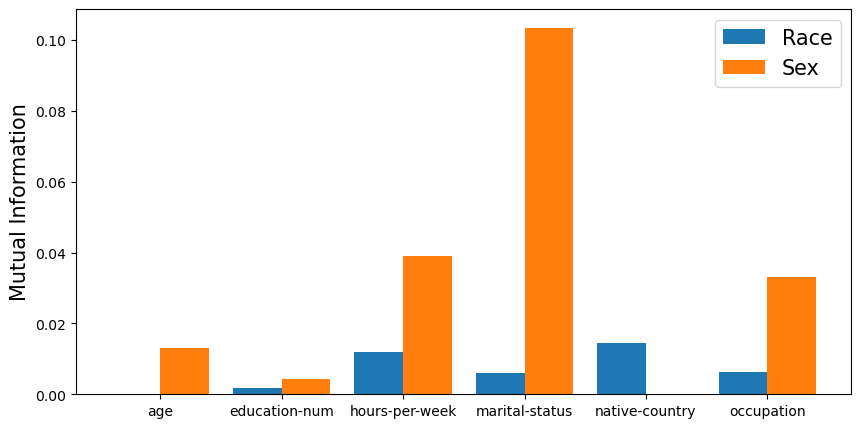

In [38]:
#Mutual information 

#Calcualte mutual information
mut_race = mutual_info_classif(X,df_fair['priv_race'],discrete_features=[1,3,4,5])
mut_sex = mutual_info_classif(X,df_fair['priv_sex'],discrete_features=[1,3,4,5])


#Plot mutual information 
plt.figure(figsize=(10, 5))

labels = ['age', 'education-num', 'hours-per-week', 'marital-status',
       'native-country', 'occupation']
x = np.arange(len(labels)) 
width = 0.4
plt.bar(x-width/2,height= mut_race,width=width,label='Race')
plt.bar(x+width/2,height= mut_sex,width=width,label='Sex')
plt.legend(fontsize=15)

plt.ylabel('Mutual Information',size=15)
plt.xticks(ticks=x,labels=labels)

plt.savefig(config['visualization_dir']+"Mutual_information.png", dpi=100)